#**FINAL PROJECT**

Link to blog on Medium: https://alexafre.medium.com/predicting-gender-of-images-d217d742a95e

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, InputLayer, BatchNormalization, MaxPooling2D, Dense, Dropout, Activation, Flatten, Input

In [ ]:
import torch
import torchvision
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils import tensorboard
from torch.utils.data import  TensorDataset, DataLoader

## Data Loading and Exploration

### Data Analysis

In [ ]:
# Start solution here
data = pd.read_csv("/content/drive/MyDrive/Final Project /age_gender.csv")
data

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [ ]:
type(data["pixels"][0])

str

There are five columns including age, ethnicity, gender, img_name, and pixels. There are no null values and age, ethnicity, and gender are of integer data type but gender and ethnicity are categorical values. Pixels represents the list of pixels of the particular image but in our dataset it is in the form of a string and needs to be converted to a numpy array.

In [ ]:
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [ ]:
type(data["pixels"][0])

numpy.ndarray

The pixels column has been changed to a numpy array.

In [ ]:
data.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


In [ ]:
data.shape

(23705, 5)

### Data Visualization

Age

In [ ]:
age_count = data["age"].value_counts()
age_count

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

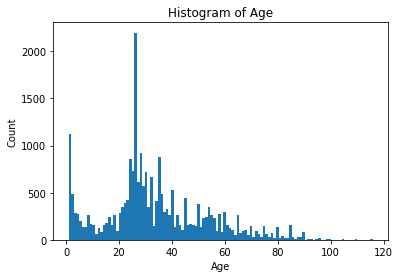

In [ ]:
plt.hist(data["age"], bins = max(data['age']))
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Gender

In [ ]:
gender_count = data["gender"].value_counts()
gender_count

0    12391
1    11314
Name: gender, dtype: int64

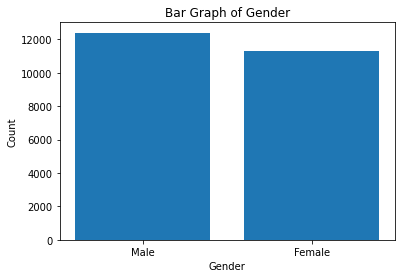

In [ ]:
plt.bar(gender_count.index, gender_count.values)
plt.title("Bar Graph of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks((0,1), labels = ["Male", "Female"])
plt.show()

0 = Male, 1 = Female

Ethnicity

In [ ]:
ethinicity_count  = data["ethnicity"].value_counts()
ethinicity_count

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

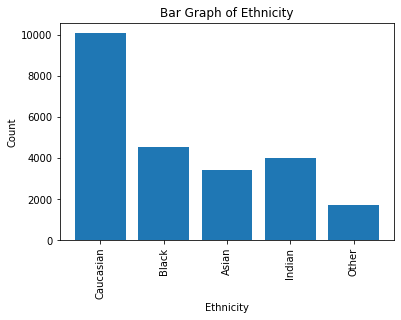

In [ ]:
plt.bar(ethinicity_count.index, ethinicity_count.values)
plt.title("Bar Graph of Ethnicity")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks([0,1,2,3,4], labels =["Caucasian","Black","Asian","Indian", "Other"], rotation = 90)
plt.show()

0 = Caucasian, 1 = Black, 2 = Asian, 3 = Indian, 4 = Other

Images

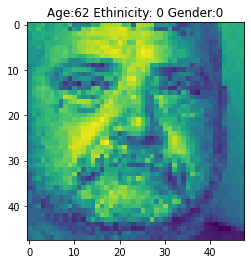

In [ ]:
row = 21000
plt.imshow(data["pixels"].iloc[row].reshape(48,48))
plt.title("Age:" + str(data['age'].iloc[row]) + " Ethinicity: " + str(data['ethnicity'].iloc[row]) + " Gender:" + str(data['gender'].iloc[row]))
plt.show()

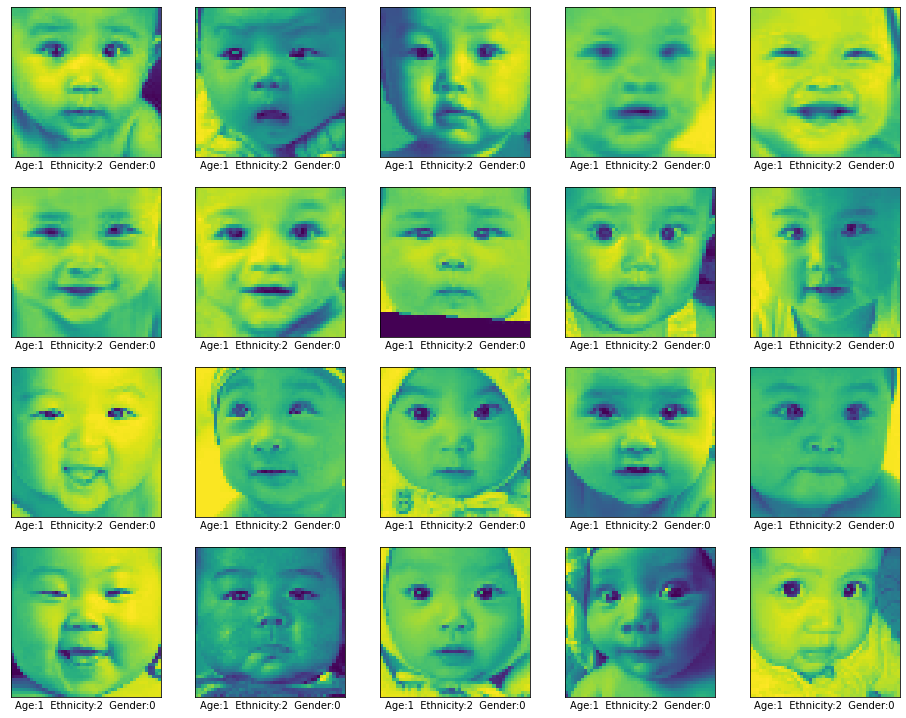

In [ ]:
plt.figure(figsize=(16,16))
for i in range(0,20):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
        "Age:"+str(data['age'].iloc[i])+
        "  Ethnicity:"+str(data['ethnicity'].iloc[i])+
        "  Gender:"+ str(data['gender'].iloc[i])
    )
plt.show()


## PyTorch Model

Predicting gender

### Data Splitting

In [ ]:
y = data["gender"]
temp = np.array(data["pixels"].tolist())
X = temp.reshape(temp.shape[0], 1, 48, 48)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Data Loader

In [ ]:
trainset = TensorDataset(torch.Tensor(X_train), torch.tensor(y_train))
valset = TensorDataset(torch.Tensor(X_test), torch.tensor(y_test))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 48, 48])
torch.Size([64])


### Model Architecture

#### 1

In [ ]:
# class Model2(nn.Module):
#   def __init__(self):
#     super(Model2, self).__init__()
#     self.layers =  nn.Sequential(nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1),
#             nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #24
#             nn.LeakyReLU(),
#             nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
#             nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #12
#             nn.LeakyReLU(),
#             nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
#             nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1), #6
#             nn.LeakyReLU(),
#             nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
#             nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1),
#             #nn.LeakyReLU(),
#             nn.AdaptiveAvgPool2d((1,1)),
#             nn.Flatten(),
#             nn.Linear(256, 128),
#             nn.ReLU(),
#             nn.Linear(128, 64),
#             nn.LeakyReLU(),
#             nn.Linear(64, 32),
#             nn.LeakyReLU(),
#             nn.Linear(32,5))
#   def forward(self, x):
#       return self.layers(x)

#### 2

In [ ]:
class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.layers =  nn.Sequential(nn.Conv2d(1, 32, kernel_size = 3),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size = 2), 
            nn.Conv2d(32, 64, kernel_size = 3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2), 
            nn.Flatten())
    self.linear = nn.Sequential(
            nn.Linear(6400,512),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.15),
            nn.Linear(64,5))
  def forward(self, x):
      x = self.layers(x)
      return self.linear(x)

### Training

In [ ]:
model2 = Model2()
model2 = model2.to('cuda')
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.to('cuda')
labels = labels.to('cuda')
logps = model2(images) 

loss = criterion(logps, labels) 

optimizer = torch.optim.RMSprop(model2.parameters(), lr = 0.001)
writer = tensorboard.SummaryWriter()
time0 = time()
epochs = 50
loss_list = []
epoch_list = []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        model2.to('cuda')
        optimizer.zero_grad()
        images = images.to('cuda')
        labels = labels.to('cuda')
        output = model2(images)
        real_out = []
        loss = criterion(output, labels)

        writer.add_scalar("Loss/train", loss, e)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        loss_list.append(running_loss/len(trainloader))
        epoch_list.append(e)
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5464604002257389
Epoch 1 - Training loss: 0.29059501273262783
Epoch 2 - Training loss: 0.2519382390911732
Epoch 3 - Training loss: 0.21262822232463144
Epoch 4 - Training loss: 0.19179562105474246
Epoch 5 - Training loss: 0.16715552867311823
Epoch 6 - Training loss: 0.14668953111426597
Epoch 7 - Training loss: 0.1267227875978156
Epoch 8 - Training loss: 0.10807778620747505
Epoch 9 - Training loss: 0.09350860622783602
Epoch 10 - Training loss: 0.08137073316407525
Epoch 11 - Training loss: 0.07183116110455659
Epoch 12 - Training loss: 0.06823758277430604
Epoch 13 - Training loss: 0.05960393765226307
Epoch 14 - Training loss: 0.05904787448344608
Epoch 15 - Training loss: 0.050327281731020926
Epoch 16 - Training loss: 0.0418476510010205
Epoch 17 - Training loss: 0.04784428682068507
Epoch 18 - Training loss: 0.0417248100769057
Epoch 19 - Training loss: 0.040802254310969
Epoch 20 - Training loss: 0.034648252212480087
Epoch 21 - Training loss: 0.03490802893408822
Epo

### Predicting

In [ ]:
correct_count, all_count = 0, 0

for images,labels in valloader:
  images.to('cuda')
  labels.to('cuda')
  for i in range(len(labels)):
    img = images
    with torch.no_grad():
        img = img.to('cuda')
        model2 = model2.to('cuda')
        logps = model2(img)  
        labels.to('cuda') 
    pred_label = torch.argmax(logps[0]).item()    
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 4741

Model Accuracy = 0.5119173170217254


## Keras Model

Predicting gender.

### Split the data 

In [ ]:
y = data["gender"]
temp = np.array(data["pixels"].tolist())
X = temp.reshape(temp.shape[0], 48, 48, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Model Architecture

In [ ]:
model = Sequential()

In [ ]:
model.add(InputLayer(input_shape=(48,48,1)))
model.add(Conv2D(filters = 32,kernel_size=(3,3), input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units = 512))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units = 256))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units = 128))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units = 64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(5))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
activation_42 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
activation_43 (Activation)   (None, 21, 21, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 10, 10, 64)       

### Training

In [ ]:
X_train.shape

(18964, 48, 48, 1)

In [ ]:
y_train.shape

(18964,)

In [ ]:
model.compile(optimizer="rmsprop",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size= 64, callbacks=[tf.keras.callbacks.ModelCheckpoint('model.hdf5', monitor='val_loss', save_best_only=True, verbose=1)])

Epoch 1/10
267/267 [==============================] - 4s 10ms/step - loss: 1.0283 - accuracy: 0.6500 - val_loss: 0.3131 - val_accuracy: 0.8540

Epoch 00001: val_loss improved from inf to 0.31310, saving model to model.hdf5
Epoch 2/10
267/267 [==============================] - 3s 9ms/step - loss: 0.3407 - accuracy: 0.8535 - val_loss: 0.3560 - val_accuracy: 0.8540

Epoch 00002: val_loss did not improve from 0.31310
Epoch 3/10
267/267 [==============================] - 3s 9ms/step - loss: 0.2828 - accuracy: 0.8837 - val_loss: 0.3126 - val_accuracy: 0.8730

Epoch 00003: val_loss improved from 0.31310 to 0.31262, saving model to model.hdf5
Epoch 4/10
267/267 [==============================] - 2s 9ms/step - loss: 0.2589 - accuracy: 0.9036 - val_loss: 0.2721 - val_accuracy: 0.8830

Epoch 00004: val_loss improved from 0.31262 to 0.27211, saving model to model.hdf5
Epoch 5/10
267/267 [==============================] - 3s 9ms/step - loss: 0.2194 - accuracy: 0.9161 - val_loss: 0.2841 - val_accura

### Predicting

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.evaluate(X_test, y_test)

149/149 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8914


[0.32472845911979675, 0.8913731575012207]

###Training History

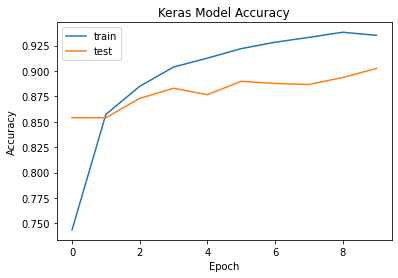

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Keras Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

[]

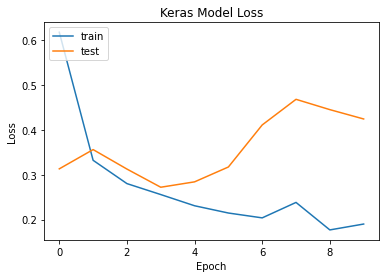

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Keras Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='upper left')
plt.plot()

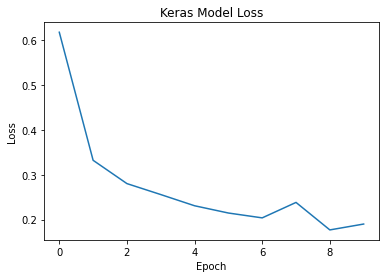

In [ ]:
plt.plot(hist.history["loss"])
plt.title("Keras Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

[]

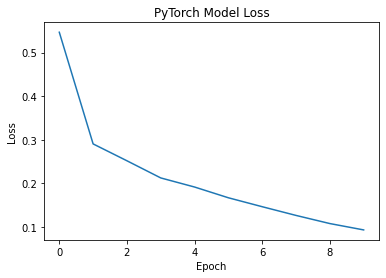

In [ ]:
plt.plot(epoch_list[:10], loss_list[:10])
plt.title("PyTorch Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot()

The PyTorch model is overfitting, as seen from the training loss and the test accuracy. Even though the training loss is decreasing, the accuracy is still at .51 for that model. For the Keras model, the accuracy is .89 even though the training loss is not as low as the PyTorch model. Therefore, I selected the Keras model as the most promising model for gender prediction.